In [1]:
!pip install catboost

In [2]:
import catboost
print(catboost.__version__)

0.22


In [3]:
from catboost import CatBoostClassifier
from catboost import datasets

train_df, test_df = datasets.amazon()
train_df.shape, test_df.shape

((32769, 10), (58921, 10))

In [4]:
train_df.head()

ACTION  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0       1     39353   85475  ...            117906       290919     117908
1       1     17183    1540  ...            118536       308574     118539
2       1     36724   14457  ...            267952        19721     117880
3       1     36135    5396  ...            240983       290919     118322
4       1     42680    5905  ...            123932        19793     119325

[5 rows x 10 columns]

In [5]:
test_df.head()

id  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0   1     78766   72734  ...            118177        19721     117880
1   2     40644    4378  ...            122008       118398     118865
2   3     75443    2395  ...            301534       249618     118175
3   4     43219   19986  ...            136187       118960     120774
4   5     42093   50015  ...            300136       118424     118425

[5 rows x 10 columns]

In [0]:
y = train_df['ACTION']
X = train_df.drop(columns='ACTION')
X_test = test_df.drop(columns='id')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
%%time

params = {'loss_function':'Logloss', 'eval_metric':'AUC', 'verbose':200, 'random_seed':200}
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5628156	best: 0.5628156 (0)	total: 97.7ms	remaining: 1m 37s
200:	test: 0.8006032	best: 0.8006032 (200)	total: 3.56s	remaining: 14.2s
400:	test: 0.8245766	best: 0.8245766 (400)	total: 7.06s	remaining: 10.5s
600:	test: 0.8353436	best: 0.8353436 (600)	total: 10.6s	remaining: 7.02s
800:	test: 0.8413611	best: 0.8415289 (786)	total: 14.2s	remaining: 3.52s
999:	test: 0.8447698	best: 0.8451226 (978)	total: 18s	remaining: 0us

bestTest = 0.8451226463
bestIteration = 978

Shrink model to first 979 iterations.
CPU times: user 28.2 s, sys: 4.07 s, total: 32.2 s
Wall time: 18.3 s


In [9]:
cat_features = list(range(X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [10]:
cat_features_names = X.columns
print(cat_features_names)
cat_features = [X.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [11]:
condition = True
cat_features_names = [col for col in X.columns if condition]
cat_features = [X.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [12]:
%%time

params = {'loss_function' : 'Logloss', 
          'eval_metric' : 'AUC',
          'cat_features' : cat_features,
          'early_stopping_rounds' : 200,
          'verbose' : 200, 
          'random_seed' : 200}
cbc_2 = CatBoostClassifier(**params)
cbc_2.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5000000	best: 0.5000000 (0)	total: 80.2ms	remaining: 1m 20s
200:	test: 0.8940063	best: 0.8940781 (184)	total: 13s	remaining: 51.7s
400:	test: 0.8961511	best: 0.8961511 (400)	total: 27.1s	remaining: 40.4s
600:	test: 0.8979192	best: 0.8979192 (600)	total: 42s	remaining: 27.9s
800:	test: 0.8957049	best: 0.8981696 (608)	total: 57.4s	remaining: 14.3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8981695953
bestIteration = 608

Shrink model to first 609 iterations.
CPU times: user 1min 37s, sys: 10.9 s, total: 1min 48s
Wall time: 58.5 s


In [0]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
np.random.seed(200)
noise_cols = [f'noise_{i}' for i in range(5)]
for col in noise_cols:
  X_train[col] = y_train * np.random.rand(X_train.shape[0])
  X_valid[col] = np.random.rand(X_valid.shape[0])

In [15]:
X_train.head()

RESOURCE  MGR_ID  ROLE_ROLLUP_1  ...   noise_2   noise_3   noise_4
16773     27798    1350         117961  ...  0.217191  0.397111  0.692751
23491     80701    4571         117961  ...  0.613397  0.536024  0.385420
32731     34039    5113         117961  ...  0.560371  0.585480  0.860696
7855      42085    4733         118290  ...  0.170314  0.390341  0.316005
16475     16358    6046         117961  ...  0.425098  0.913541  0.608824

[5 rows x 14 columns]

In [16]:
%%time

params = {'loss_function' : 'Logloss',
          'eval_metric' : 'AUC',
          'cat_features' : cat_features,
          'verbose' : 200,
          'random_seed' : 200}
cbc_5 = CatBoostClassifier(**params)
cbc_5.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.4985423	best: 0.4985423 (0)	total: 168ms	remaining: 2m 48s
200:	test: 0.5608985	best: 0.5902344 (13)	total: 10.3s	remaining: 40.8s
400:	test: 0.5590457	best: 0.5902344 (13)	total: 21.3s	remaining: 31.9s
600:	test: 0.5590457	best: 0.5902344 (13)	total: 32.5s	remaining: 21.6s
800:	test: 0.5590457	best: 0.5902344 (13)	total: 41.1s	remaining: 10.2s
999:	test: 0.5590457	best: 0.5902344 (13)	total: 49.4s	remaining: 0us

bestTest = 0.5902343957
bestIteration = 13

Shrink model to first 14 iterations.
CPU times: user 1min 25s, sys: 7.18 s, total: 1min 32s
Wall time: 49.9 s


In [17]:
ignored_features = list(range(X_train.shape[1] - 5, X_train.shape[1]))
print(ignored_features)

[9, 10, 11, 12, 13]


In [18]:
%%time

params = {'loss_function' : 'Logloss',
          'eval_metric' : 'AUC',
          'cat_features' : cat_features,
          'ignored_features' : ignored_features,
          'early_stopping_rounds' : 200,
          'verbose' : 200,
          'random_seed' : 200}

cbc_6 = CatBoostClassifier(**params)
cbc_6.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5000000	best: 0.5000000 (0)	total: 43.7ms	remaining: 43.7s
200:	test: 0.8940063	best: 0.8940781 (184)	total: 13.2s	remaining: 52.3s
400:	test: 0.8961511	best: 0.8961511 (400)	total: 27.3s	remaining: 40.8s
600:	test: 0.8979192	best: 0.8979192 (600)	total: 42.4s	remaining: 28.1s
800:	test: 0.8957049	best: 0.8981696 (608)	total: 57.9s	remaining: 14.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8981695953
bestIteration = 608

Shrink model to first 609 iterations.
CPU times: user 1min 38s, sys: 11.3 s, total: 1min 49s
Wall time: 59.1 s


In [0]:
X_train = X_train.drop(columns=noise_cols)
X_valid = X_valid.drop(columns=noise_cols)

In [20]:
X_train.head()

RESOURCE  MGR_ID  ...  ROLE_FAMILY  ROLE_CODE
16773     27798    1350  ...       290919     117908
23491     80701    4571  ...       308574     118687
32731     34039    5113  ...       118424     119435
7855      42085    4733  ...       118295     118982
16475     16358    6046  ...       118331     118332

[5 rows x 9 columns]

In [0]:
from catboost import Pool

train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [22]:
%%time

params = {'loss_function' : 'Logloss',
          'eval_metric' : 'AUC',
          'cat_features' : cat_features,
          'early_stopping_rounds' : 200,
          'verbose' : 200,
          'random_seed' : 200}
cbc_7 = CatBoostClassifier(**params)
cbc_7.fit(train_data, eval_set=valid_data, use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5000000	best: 0.5000000 (0)	total: 62.7ms	remaining: 1m 2s
200:	test: 0.8940063	best: 0.8940781 (184)	total: 13.2s	remaining: 52.4s
400:	test: 0.8961511	best: 0.8961511 (400)	total: 27.4s	remaining: 40.9s
600:	test: 0.8979192	best: 0.8979192 (600)	total: 42.4s	remaining: 28.1s
800:	test: 0.8957049	best: 0.8981696 (608)	total: 57.8s	remaining: 14.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8981695953
bestIteration = 608

Shrink model to first 609 iterations.
CPU times: user 1min 38s, sys: 11.1 s, total: 1min 49s
Wall time: 58.8 s


In [0]:
from catboost import cv

In [28]:
%%time

params = {'loss_function' : 'Logloss',
          'eval_metric' : 'AUC',
          'verbose' : 200,
          'random_seed' : 200}
all_train_data = Pool(data=X, label=y, cat_features=cat_features)
score = cv(pool=all_train_data, params=params, fold_count=4, seed=200, shuffle=True, stratified=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5000000	best: 0.5000000 (0)	total: 350ms	remaining: 5m 50s
200:	test: 0.8832262	best: 0.8832262 (200)	total: 1m 8s	remaining: 4m 32s
400:	test: 0.8871882	best: 0.8871901 (399)	total: 2m 30s	remaining: 3m 44s
600:	test: 0.8892127	best: 0.8892293 (599)	total: 3m 54s	remaining: 2m 35s
800:	test: 0.8897740	best: 0.8898201 (747)	total: 5m 20s	remaining: 1m 19s
999:	test: 0.8899696	best: 0.8899696 (999)	total: 6m 51s	remaining: 0us
CPU times: user 8min 39s, sys: 1min, total: 9min 39s
Wall time: 6min 52s


In [29]:
cbc_7.get_feature_importance(prettified=True)

Feature Id  Importances
0          RESOURCE    20.565430
1     ROLE_DEPTNAME    18.004456
2            MGR_ID    15.666620
3  ROLE_FAMILY_DESC    10.728032
4     ROLE_ROLLUP_2    10.593491
5        ROLE_TITLE     7.658043
6       ROLE_FAMILY     6.483667
7     ROLE_ROLLUP_1     5.889873
8         ROLE_CODE     4.410388

In [0]:
import pandas as pd

feature_importance_df = pd.DataFrame(cbc_7.get_feature_importance(prettified=True),
                                     columns=['feature','importance'])
feature_importance_df = cbc_7.get_feature_importance(prettified=True)

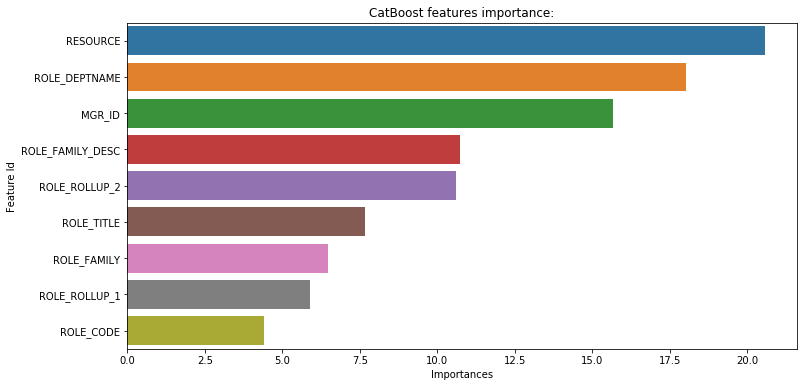

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

In [47]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394156 sha256=20df28359d056ebeb8b017006db85372370bc51965eb66c4bac98e4710f95836
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [49]:
import shap

explainer = shap.TreeExplainer(cbc_7)
shap_values = explainer.shap_values(train_data)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

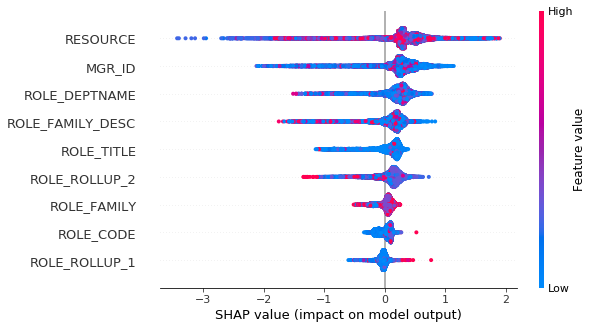

In [50]:
shap.summary_plot(shap_values, X_train)

In [55]:
%%time

from sklearn.model_selection import StratifiedKFold

n_fold = 4 # amount of data folds
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=200)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': 200}

test_data = Pool(data=X_test, cat_features=cat_features)

scores = []
prediction = np.zeros(X_test.shape[0])
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_features)
    
    model = CatBoostClassifier(**params)
    model.fit(train_data, eval_set=valid_data, use_best_model=True)
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict_proba(test_data)[:, 1]
    prediction += y_pred

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

Learning rate set to 0.069882
0:	test: 0.5000000	best: 0.5000000 (0)	total: 21.1ms	remaining: 21.1s
200:	test: 0.8782304	best: 0.8792381 (120)	total: 13.1s	remaining: 52.3s
400:	test: 0.8792311	best: 0.8795764 (316)	total: 27.3s	remaining: 40.8s
600:	test: 0.8791241	best: 0.8796874 (489)	total: 42.1s	remaining: 27.9s
800:	test: 0.8771501	best: 0.8796874 (489)	total: 57.3s	remaining: 14.2s
999:	test: 0.8753058	best: 0.8796874 (489)	total: 1m 11s	remaining: 0us

bestTest = 0.879687402
bestIteration = 489

Shrink model to first 490 iterations.
Learning rate set to 0.069883
0:	test: 0.5000000	best: 0.5000000 (0)	total: 22.3ms	remaining: 22.2s
200:	test: 0.9041254	best: 0.9041254 (200)	total: 13.2s	remaining: 52.6s
400:	test: 0.9075438	best: 0.9078013 (384)	total: 27.4s	remaining: 41s
600:	test: 0.9079936	best: 0.9084867 (519)	total: 42s	remaining: 27.9s
800:	test: 0.9069316	best: 0.9084867 (519)	total: 56.7s	remaining: 14.1s
999:	test: 0.9046459	best: 0.9084867 (519)	total: 1m 11s	remainin

https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview